# Corona Virus Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
sbn.set(rc={'figure.figsize':(11.7,8.27)})


In [2]:
rawData = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
dataFrames = dict(states={}, counties={})
columns = ['cases', 'deaths']

def getTotal(): 
    if not "total" in dataFrames:
        dataFrames["total"] =rawData.groupby('date').sum()[columns]
    return dataFrames["total"]

def getState(state):
    if not state in dataFrames["states"]:
        statedf = rawData[rawData.state==state].groupby('date').sum()[columns]
        if statedf.empty:
            print (state + " is not in the data, did you spell it right? capitalization?")
            return 
        else:
            dataFrames["states"][state] = statedf
    return dataFrames["states"][state]

def getCounty(county):
    if not county in dataFrames["counties"]:
        countydf = rawData[rawData.county==county].groupby('date').sum()[columns]
        if countydf.empty:
            print(county + " is not in the data, did you spell it right? capitalization?")
            return
        else:
            dataFrames["counties"][county] = countydf
    return dataFrames["counties"][county]
        

In [4]:
yesterday, today = getTotal().tail(2).index.values # last two dates data to check how recent this data is
print("Latest date: ", today)

Latest date:  2020-04-13


In [5]:

yesterdayLatest = rawData[rawData.date == yesterday].groupby(['state', 'county']).sum()[columns]
latest = rawData[rawData.date == today].groupby(['state', 'county']).sum()[columns]
deltas = latest - yesterdayLatest
latest["newcases"] = deltas.cases
latest["newdeaths"] = deltas.deaths
latest = latest.reset_index()

In [6]:
print("Counties with the most new cases:", today)
latest.sort_values('newcases', ascending=False)[:30]

Counties with the most new cases: 2020-04-13


state           county   cases  deaths  newcases  newdeaths
1594       New York    New York City  106764    7154    3556.0      437.0
565        Illinois             Cook   15474     543     889.0       58.0
1613       New York          Suffolk   21643     580     827.0       51.0
1593       New York           Nassau   24358    1109     805.0       79.0
1178       Michigan            Wayne   11648     760     484.0       56.0
1621       New York      Westchester   19785     610     472.0       48.0
276     Connecticut        Fairfield    6004     262     470.0       14.0
1977   Pennsylvania     Philadelphia    6810     127     458.0       -1.0
1537     New Jersey            Union    6636     217     456.0        8.0
280     Connecticut        New Haven    3358     135     412.0       16.0
1526     New Jersey           Hudson    7879     236     410.0       10.0
332         Florida       Miami-Dade    7458     109     401.0       12.0
1533     New Jersey          Passaic    5950     136     360.0        5.0
277     Connecticut         Hartford    2243     133     329.0       17.0
1096  Massachusetts        Middlesex    5983     163     323.0       14.0
1999   Rhode Island          Unknown    1300      53     311.0       10.0
1519     New Jersey           Bergen   10092     482     308.0       29.0
1529     New Jersey        Middlesex    5987     204     294.0       11.0
1605       New York         Rockland    7965     182     244.0       16.0
1092  Massachusetts            Essex    3413     113     243.0       12.0
295         Florida          Broward    3177      77     232.0        1.0
183      California      Los Angeles    9420     320     228.0       24.0
1524     New Jersey            Essex    7634     433     224.0        5.0
1100  Massachusetts          Suffolk    5579      99     220.0       18.0
1098  Massachusetts          Norfolk    2838     105     189.0       14.0
1080       Maryland  Prince George's    2205      63     170.0        8.0
1146       Michigan           Macomb    3418     240     164.0       23.0
1159       Michigan          Oakland    5073     347     158.0       18.0
2430       Virginia          Fairfax    1164      20     156.0        4.0
1599       New York           Orange    5182     122     155.0       10.0

In [7]:
print("Counties with the most new cases in California:", today)
latest[latest.state=="California"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in California: 2020-04-13


state          county  cases  deaths  newcases  newdeaths
183  California     Los Angeles   9420     320     228.0       24.0
195  California       Riverside   1751      50     132.0        9.0
198  California  San Bernardino    977      31      90.0        0.0
200  California   San Francisco    960      15      85.0        1.0
180  California            Kern    454       3      58.0        0.0
203  California       San Mateo    701      21      49.0        0.0
205  California     Santa Clara   1666      61      45.0        7.0
199  California       San Diego   1847      47      43.0        2.0
166  California         Alameda    907      23      43.0        0.0
214  California          Tulare    264      13      37.0        2.0

In [8]:
print("Counties with the most new cases in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newcases', ascending=False)[:10]

Counties with the most new cases in Colorado: 2020-04-13


state     county  cases  deaths  newcases  newdeaths
232  Colorado     Denver   1346      51      99.0        5.0
274  Colorado       Weld    808      53      70.0        5.0
221  Colorado   Arapahoe   1142      39      59.0        1.0
219  Colorado      Adams    693      26      46.0        0.0
235  Colorado    El Paso    641      39      28.0        2.0
244  Colorado  Jefferson    787      30      24.0        1.0
224  Colorado    Boulder    284      12      20.0        1.0
257  Colorado     Morgan     75       0      16.0        0.0
233  Colorado    Douglas    304      11       6.0        1.0
248  Colorado    Larimer    193       9       6.0        0.0

In [9]:
print("Counties with the most new deaths:", today)
latest.sort_values('newdeaths', ascending=False)[:30]

Counties with the most new deaths: 2020-04-13


state         county   cases  deaths  newcases  newdeaths
1594       New York  New York City  106764    7154    3556.0      437.0
1593       New York         Nassau   24358    1109     805.0       79.0
565        Illinois           Cook   15474     543     889.0       58.0
1178       Michigan          Wayne   11648     760     484.0       56.0
1613       New York        Suffolk   21643     580     827.0       51.0
1621       New York    Westchester   19785     610     472.0       48.0
1519     New Jersey         Bergen   10092     482     308.0       29.0
183      California    Los Angeles    9420     320     228.0       24.0
1972   Pennsylvania     Montgomery    2285      91     121.0       23.0
1146       Michigan         Macomb    3418     240     164.0       23.0
1159       Michigan        Oakland    5073     347     158.0       18.0
1100  Massachusetts        Suffolk    5579      99     220.0       18.0
277     Connecticut       Hartford    2243     133     329.0       17.0
280     Connecticut      New Haven    3358     135     412.0       16.0
1605       New York       Rockland    7965     182     244.0       16.0
276     Connecticut      Fairfield    6004     262     470.0       14.0
1098  Massachusetts        Norfolk    2838     105     189.0       14.0
1096  Massachusetts      Middlesex    5983     163     323.0       14.0
1008      Louisiana      Jefferson    5088     186      98.0       13.0
1092  Massachusetts          Essex    3413     113     243.0       12.0
332         Florida     Miami-Dade    7458     109     401.0       12.0
1094  Massachusetts        Hampden    1694     116      47.0       11.0
339         Florida     Palm Beach    1702      92      58.0       11.0
1529     New Jersey      Middlesex    5987     204     294.0       11.0
1579       New York           Erie    1624      86      53.0       11.0
1099  Massachusetts       Plymouth    2141      72     117.0       11.0
1599       New York         Orange    5182     122     155.0       10.0
1999   Rhode Island        Unknown    1300      53     311.0       10.0
1526     New Jersey         Hudson    7879     236     410.0       10.0
2450       Virginia        Henrico     397      45      18.0       10.0

In [10]:
print("Counties with the most new deaths in California:", today)
latest[latest.state=="California"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in California: 2020-04-13


state         county  cases  deaths  newcases  newdeaths
183  California    Los Angeles   9420     320     228.0       24.0
195  California      Riverside   1751      50     132.0        9.0
205  California    Santa Clara   1666      61      45.0        7.0
214  California         Tulare    264      13      37.0        2.0
199  California      San Diego   1847      47      43.0        2.0
217  California           Yolo    101       4       8.0        1.0
196  California     Sacramento    739      27      32.0        1.0
200  California  San Francisco    960      15      85.0        1.0
201  California    San Joaquin    309      17      36.0        1.0
193  California         Placer    127       5       3.0        1.0

In [11]:
print("Counties with the most new deaths in Colorado:", today)
latest[latest.state=="Colorado"].sort_values('newdeaths', ascending=False)[:10]

Counties with the most new deaths in Colorado: 2020-04-13


state     county  cases  deaths  newcases  newdeaths
274  Colorado       Weld    808      53      70.0        5.0
232  Colorado     Denver   1346      51      99.0        5.0
235  Colorado    El Paso    641      39      28.0        2.0
221  Colorado   Arapahoe   1142      39      59.0        1.0
224  Colorado    Boulder    284      12      20.0        1.0
226  Colorado    Chaffee     28       4       0.0        1.0
234  Colorado      Eagle    457       6       5.0        1.0
233  Colorado    Douglas    304      11       6.0        1.0
244  Colorado  Jefferson    787      30      24.0        1.0
259  Colorado      Ouray      4       1       0.0        0.0

In [12]:
def fitExponential(series):
    series = series.dropna()
    series = series[series>0]
    logseries = np.log(series)
    n = len(logseries)
    rate, intercept = np.polyfit(np.arange(n), logseries, 1) 
    base = np.exp(intercept)
    return (rate, base, n) 


In [13]:
def plotFitted(series, name, log=True): 
    (rate, base, n) = fitExponential(series)
    x = np.arange(n)
    series = series[-n:]
    if log:
        plt.semilogy()
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    sbn.scatterplot(x, series, label=f"{name} actual")
    sbn.lineplot(x, base * np.exp(rate*x) , label=f"{name} expected with constant exponential growth")
    plt.show()

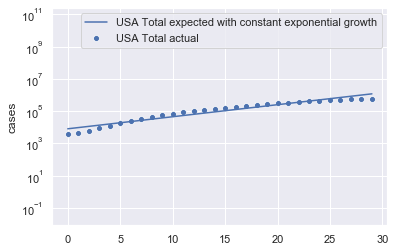

In [14]:
plotFitted(getTotal()["cases"][-30:], "USA Total")

In [15]:
def growthRateAnalysis(series, name, n=30):
    rate, base, n = fitExponential(series[-n:])
    name = f"{name} {series.name}"
    formula = f"{series.name} = {np.round(base, 2)} * exp({np.round(rate, 4)} * day)"
    dailyGrowth = np.round(100 * (np.exp(rate) - 1), 2)
    daysToDoubling = np.round(np.log(2)/rate, 2)
    print(f"{name} exponential formula fitted with {n} points:")
    print(formula)
    print(f"fitted daily growth rate: {dailyGrowth} %, fitted days to doubling: {daysToDoubling}")
    deltas = series.diff(1)
    rates = 100*deltas/series
    data = {
        f"{name} day to day growth rate (%)":rates, 
        f"{name} 3 day moving average":rates.rolling(window=3).mean(), 
        f"{name} 5 day moving average":rates.rolling(window=5).mean(), 
    }
    df = pd.DataFrame(data).dropna()[-n:]
    gr = df.tail(1)[f"{name} 5 day moving average"].values[0]
    dailyGrowth = np.round(gr, 2)
    daysToDoubling = np.round(np.log(2)*100/gr, 2)
    print(f"actual daily growth rate: {dailyGrowth} %, actual days to doubling: {daysToDoubling}")    
    sbn.lineplot(data=df)
    plt.show()
    plotFitted(series[-n:], name)


Total USA cases exponential formula fitted with 30 points:
cases = 7993.76 * exp(0.1722 * day)
fitted daily growth rate: 18.8 %, fitted days to doubling: 4.02
actual daily growth rate: 5.86 %, actual days to doubling: 11.82


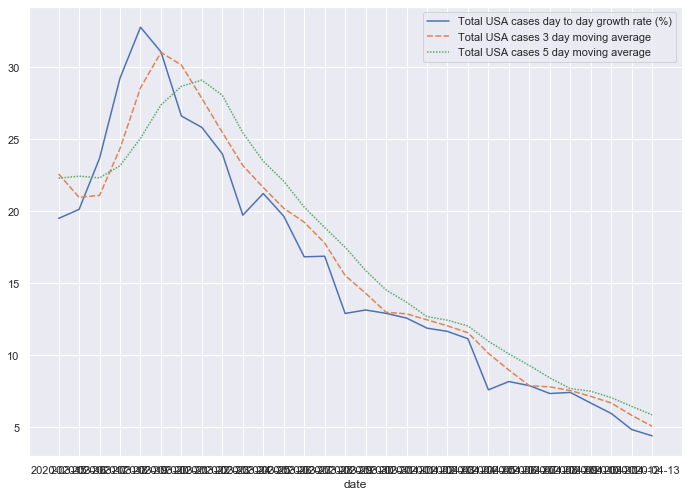

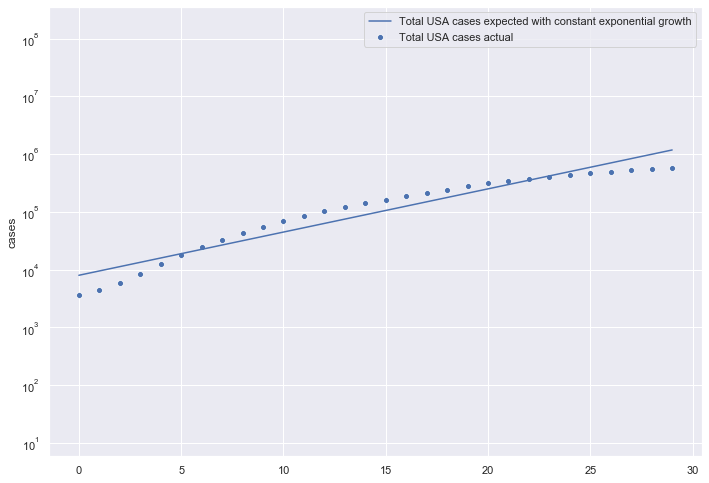

In [16]:
growthRateAnalysis(getTotal()['cases'], "Total USA")

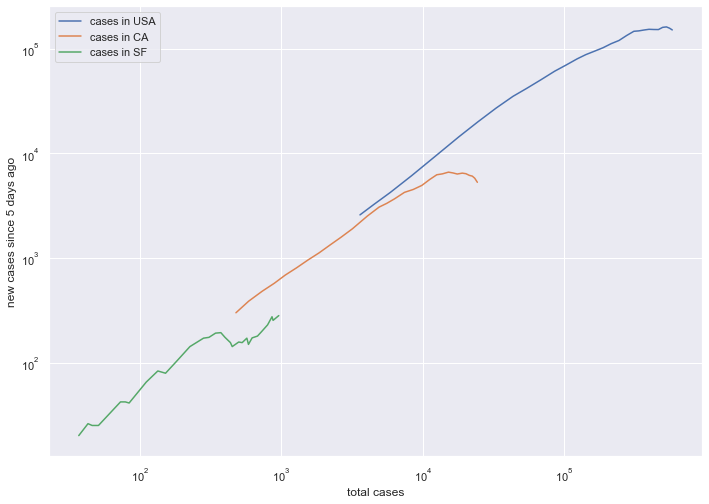

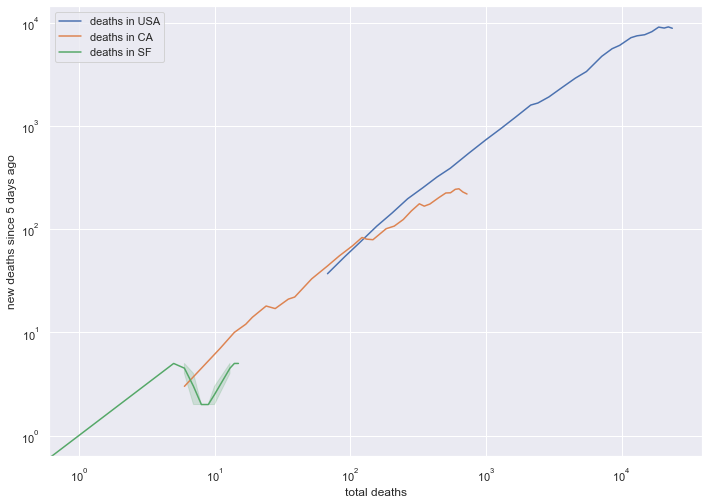

In [17]:
def trajectoryPlot(series, name):
    deltas = series.diff(5)
    fullname = f"{series.name} in {name}"
    x = f"total {series.name}"
    y = f"new {series.name} since 5 days ago"
    data = {x: series, y: deltas}
    plt.loglog()
    df = pd.DataFrame(data).dropna()[-30:]
    sbn.lineplot(x, y, data=df, label=fullname)
    
trajectoryPlot(getTotal()['cases'], "USA")
trajectoryPlot(getState("California")['cases'], "CA")
trajectoryPlot(getCounty("San Francisco")["cases"], "SF")
plt.show()
trajectoryPlot(getTotal()['deaths'], "USA")
trajectoryPlot(getState("California")['deaths'], "CA")
trajectoryPlot(getCounty("San Francisco")["deaths"], "SF")
plt.show()

In [18]:
def laggedPlot(df, name):
    vals = df.copy()
    vals = df.dropna()[df.cases > 0]
    # show correlation with wide range of time lags
    for i in range(30):
        vals[i] = df.cases.shift(i)
    vals = vals.drop(columns='cases')
    vals = vals[vals.deaths > 0][-20:]
    corrs = vals.corr()[['deaths']].drop('deaths')
    lc = np.log(vals).corr()[['deaths']].drop('deaths')
    lc[0] = lc.deaths
    for i in [3, 5, 7]:
        lc[i] = lc.deaths.rolling(i).mean()
    lc = lc.dropna()
    corrdata = {
        f"{name} correlation of log of deaths to log of cases by # of days ago": lc[0],
        f"{name} correlation 3 day moving average": lc[3],
        f"{name} correlation 5 day moving average": lc[5],
        f"{name} correlation 7 day moving average": lc[7],
    }
    corrsdf = pd.DataFrame(corrdata)
    print(f"Correlations for {name}:")
    sbn.lineplot(data=corrsdf)
    plt.show()
    # dig deeper into an interesting set of time lags
    values = vals[["deaths"]].copy()
    ratios = vals[["deaths"]].copy()
    interesting = [7, 14]
    for i in [0, 3, 5, 7]:
        l = lc[i].dropna()
        lmax = l[l==max(l)] # max at this correlation moving average
        interesting += list(lmax.index)
    for i in sorted(list(set(interesting))):
        values[f"{name} cases {i} days ago"] = vals[i]
        ratios[f"{name} deaths/cases {i} days ago"] = vals.deaths/vals[i]
    ratios = ratios.drop(columns=['deaths'])
    print(f"Deaths vs Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=values, dashes=False)
    plt.show()
    print(f"Deaths / Lagged Values For {name}:")
    plt.semilogy()
    sbn.lineplot(data=ratios, dashes=False)
    plt.show()

    

In [19]:
# laggedPlot(getTotal(), "USA")
# laggedPlot(getState("California"), "CA")
# laggedPlot(getCounty("San Francisco"), "SF")

In [20]:
def analyse(counties=[], states=[], n=20):
    sbn.set(rc={'figure.figsize':(11.7,8.27)})
    names = counties + states + ["USA total:"]
    rates= []
    dfs = [getCounty(c) for c in counties] + [getState(s) for s in states] + [getTotal()] 
    print("Trajectory Plots to see if the curve is flattening:")
    for col in ["cases", "deaths"]:
        for df, name in zip(dfs, names):
            trajectoryPlot(df[col], name)
        plt.show()
    for df, name in zip(dfs, names):
        print(f"\n### Analysis for {name:} ###\n")
        growthRateAnalysis(df["cases"], name)
        growthRateAnalysis(df["deaths"], name)
        print(f"Trajectory plots for {name}, to see when the curve starts flattening")
        trajectoryPlot(df.cases, name)
        trajectoryPlot(df.deaths, name)
        plt.show()
        laggedPlot(df, name)


        
    
    

Trajectory Plots to see if the curve is flattening:


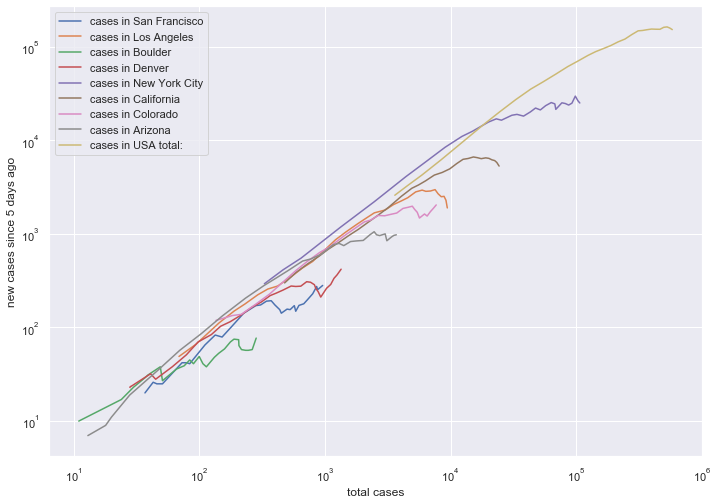

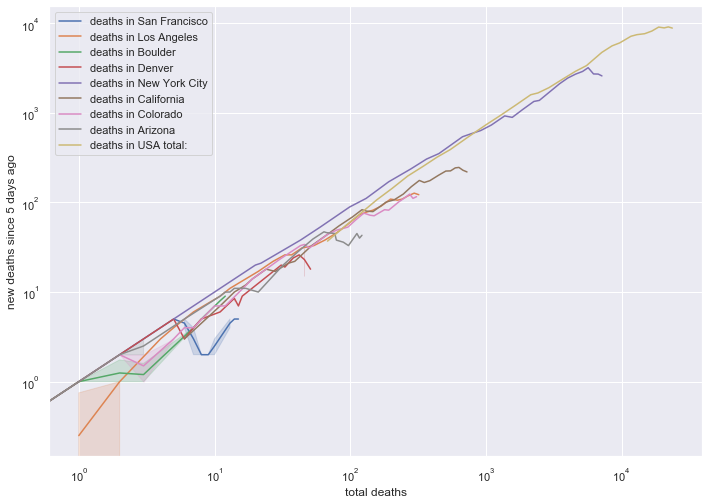


### Analysis for San Francisco ###

San Francisco cases exponential formula fitted with 30 points:
cases = 49.84 * exp(0.1135 * day)
fitted daily growth rate: 12.02 %, fitted days to doubling: 6.11
actual daily growth rate: 6.65 %, actual days to doubling: 10.42


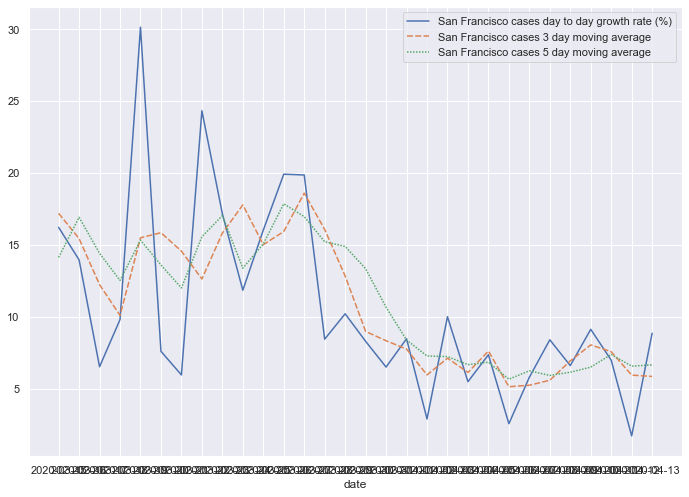

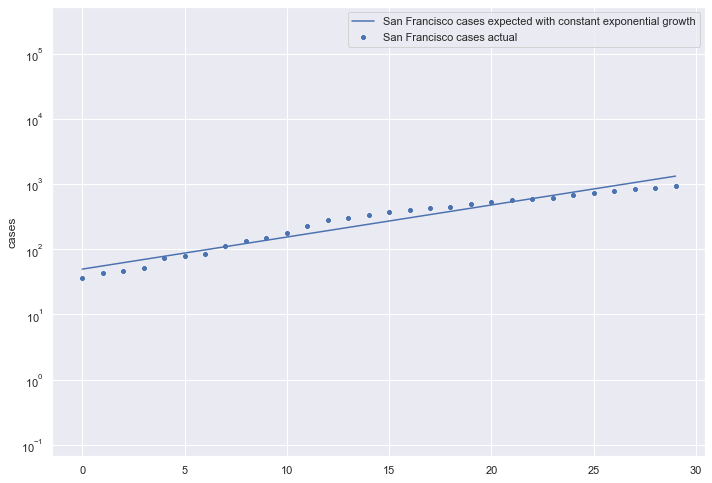

San Francisco deaths exponential formula fitted with 20 points:
deaths = 2.46 * exp(0.1043 * day)
fitted daily growth rate: 10.99 %, fitted days to doubling: 6.65
actual daily growth rate: 7.38 %, actual days to doubling: 9.4


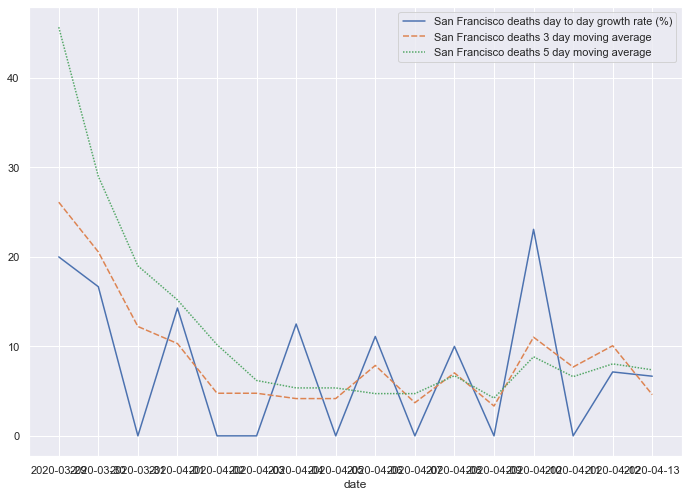

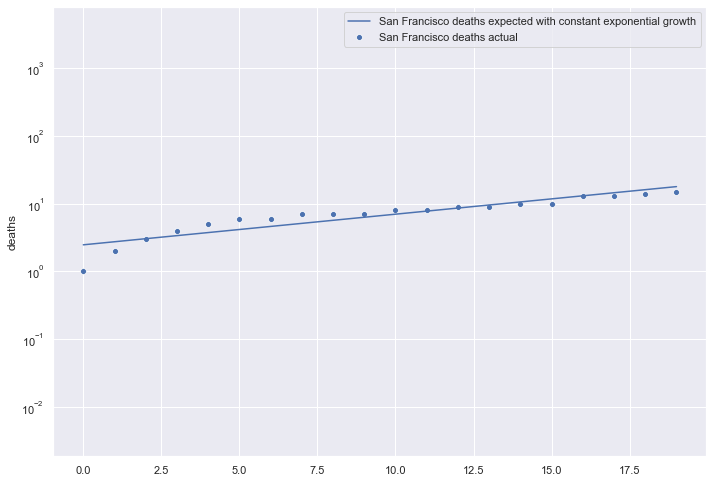

Trajectory plots for San Francisco, to see when the curve starts flattening


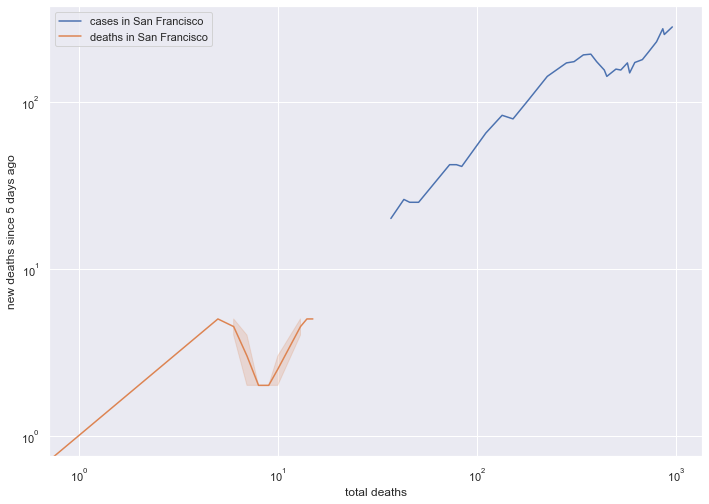

Correlations for San Francisco:


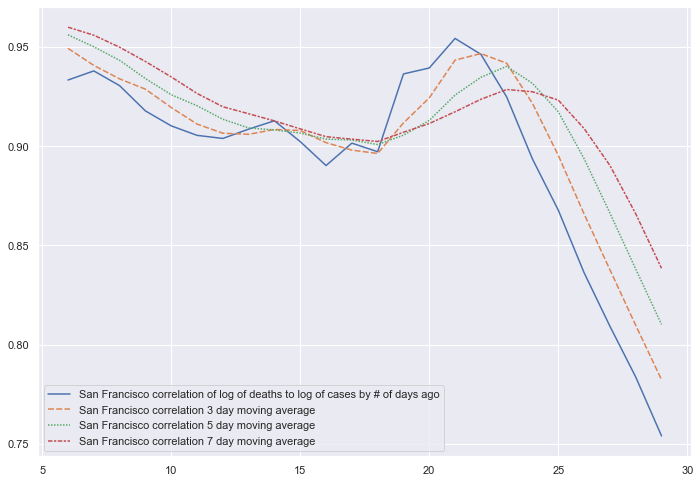

Deaths vs Lagged Values For San Francisco:


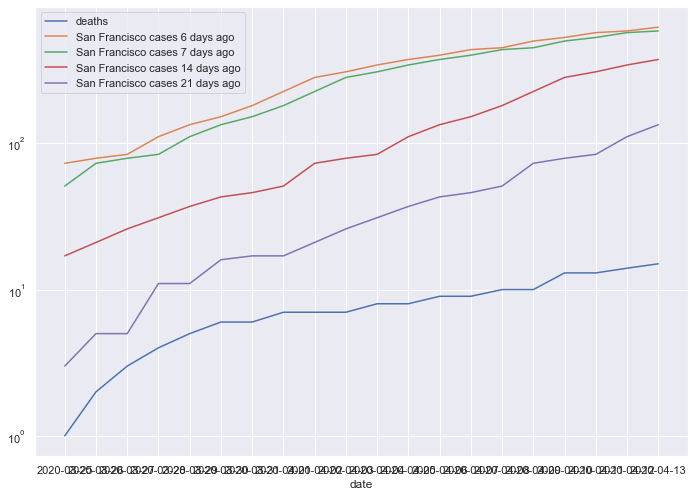

Deaths / Lagged Values For San Francisco:


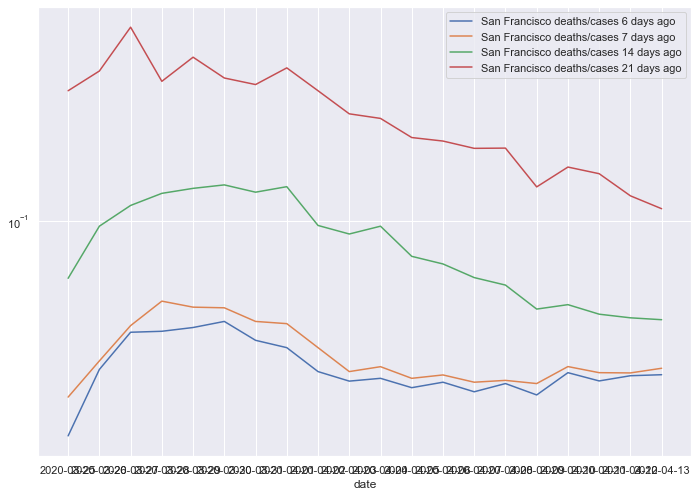


### Analysis for Los Angeles ###

Los Angeles cases exponential formula fitted with 30 points:
cases = 132.43 * exp(0.1709 * day)
fitted daily growth rate: 18.64 %, fitted days to doubling: 4.06
actual daily growth rate: 4.37 %, actual days to doubling: 15.85


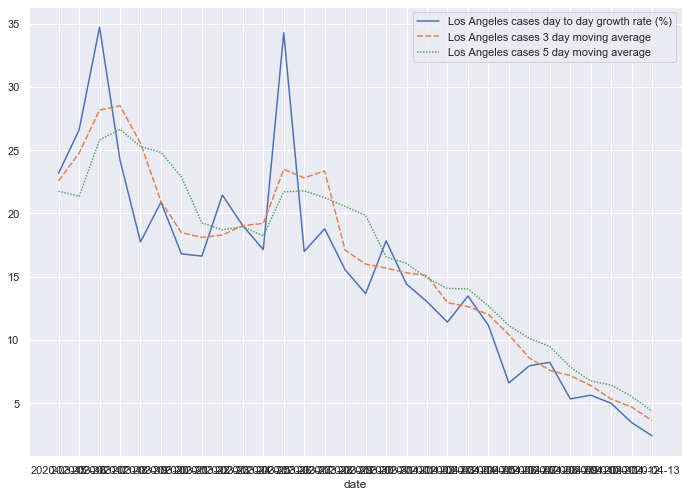

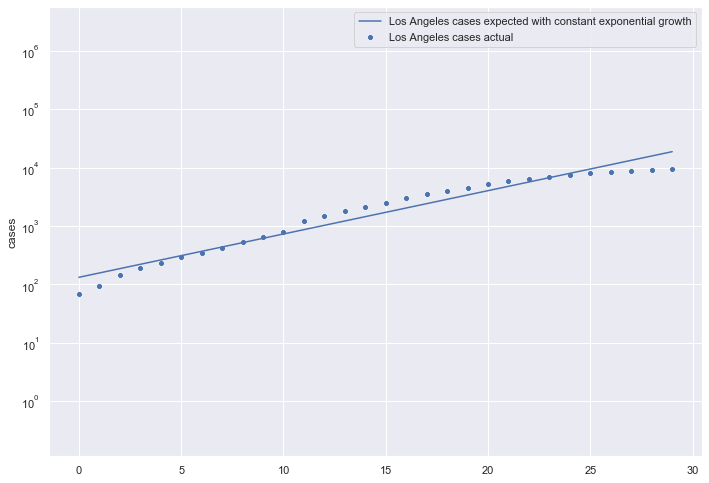

Los Angeles deaths exponential formula fitted with 30 points:
deaths = 1.12 * exp(0.2189 * day)
fitted daily growth rate: 24.47 %, fitted days to doubling: 3.17
actual daily growth rate: 9.14 %, actual days to doubling: 7.58


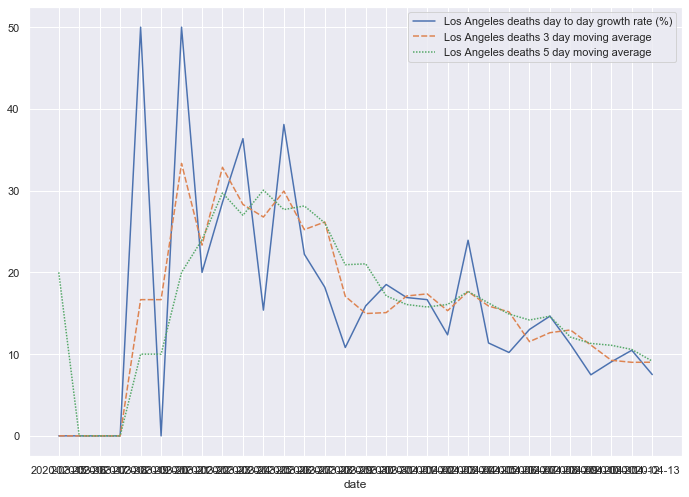

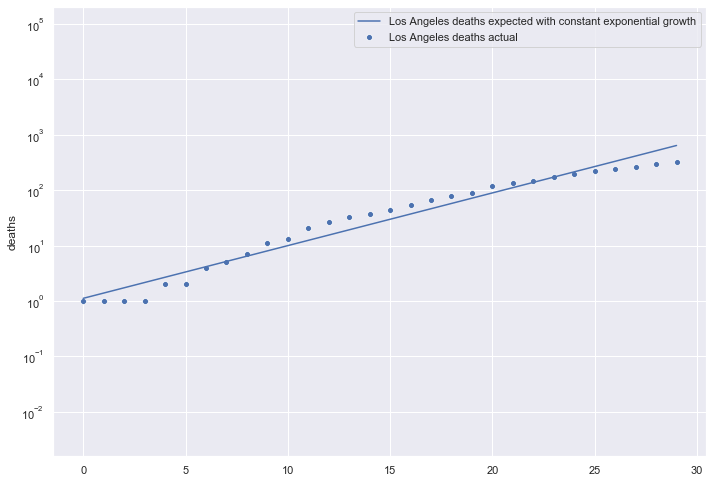

Trajectory plots for Los Angeles, to see when the curve starts flattening


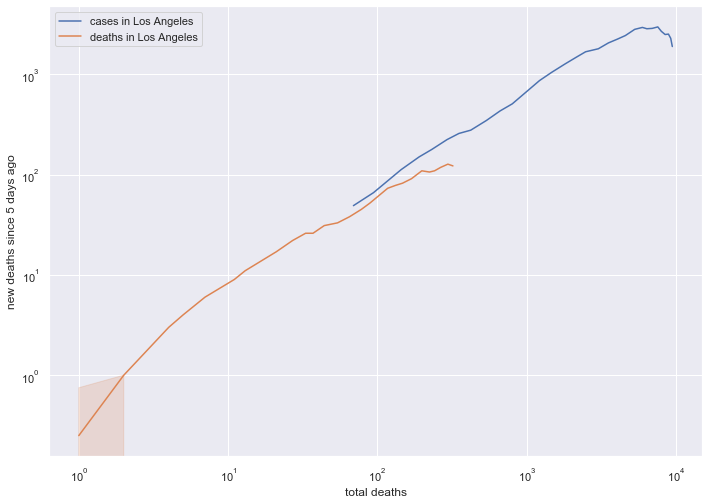

Correlations for Los Angeles:


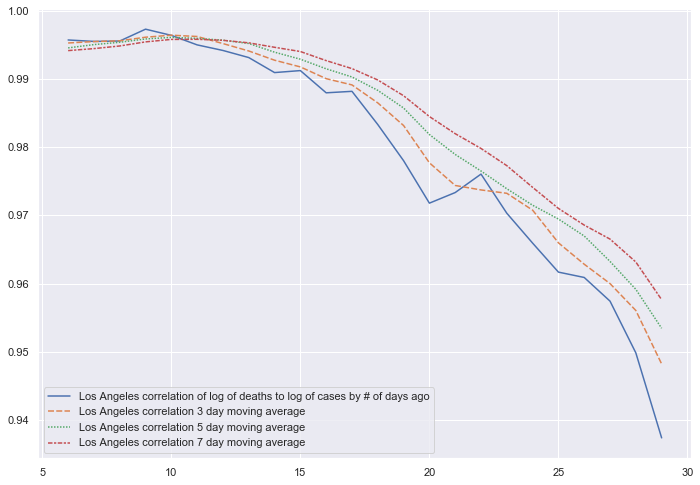

Deaths vs Lagged Values For Los Angeles:


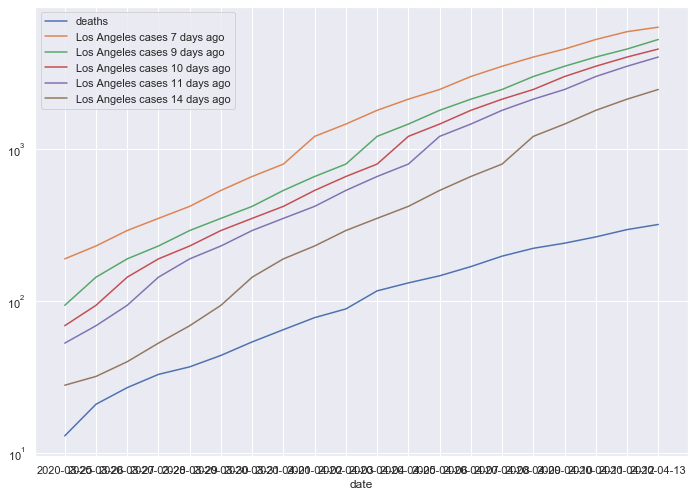

Deaths / Lagged Values For Los Angeles:


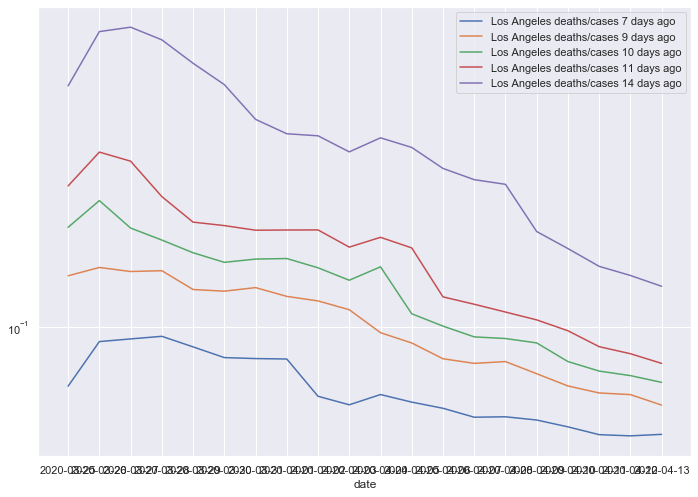


### Analysis for Boulder ###

Boulder cases exponential formula fitted with 30 points:
cases = 10.7 * exp(0.1288 * day)
fitted daily growth rate: 13.75 %, fitted days to doubling: 5.38
actual daily growth rate: 6.12 %, actual days to doubling: 11.32


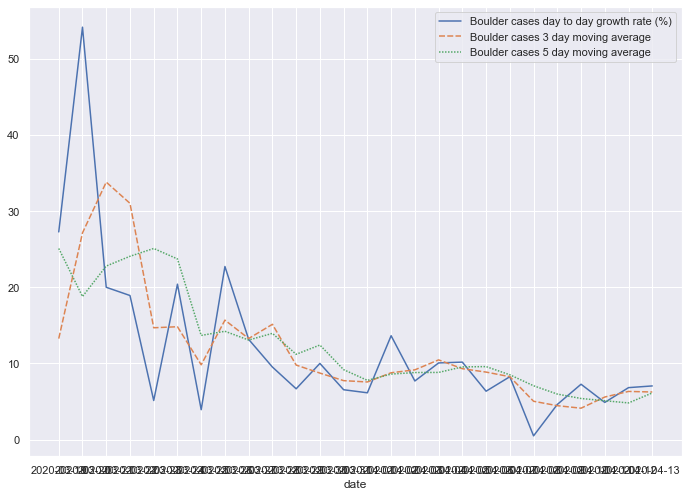

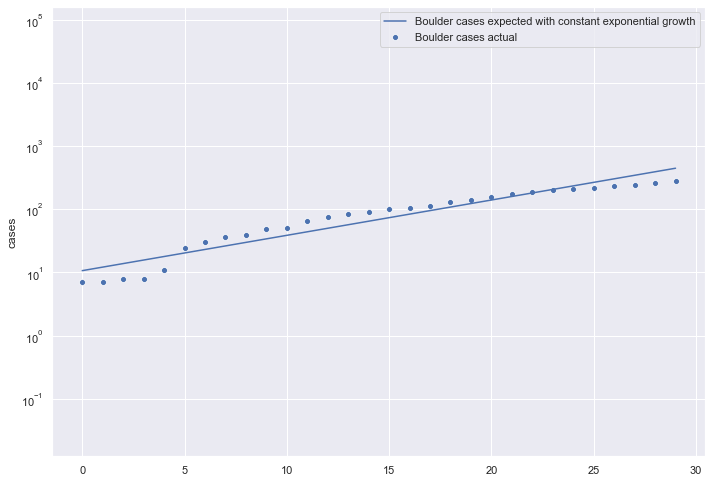

Boulder deaths exponential formula fitted with 18 points:
deaths = 0.82 * exp(0.1486 * day)
fitted daily growth rate: 16.02 %, fitted days to doubling: 4.66
actual daily growth rate: 21.05 %, actual days to doubling: 3.29


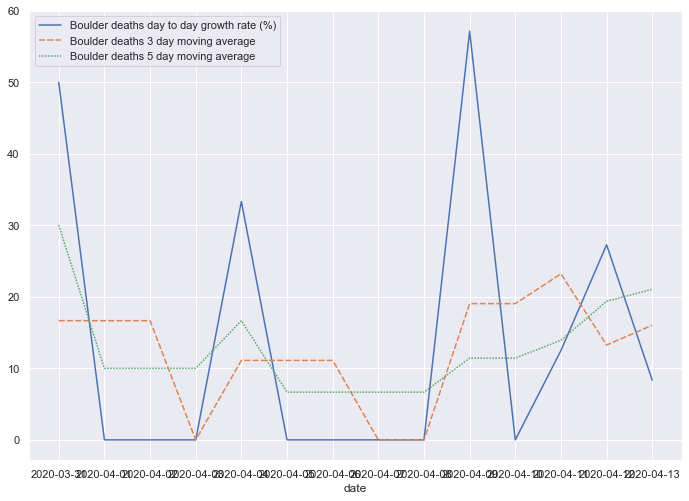

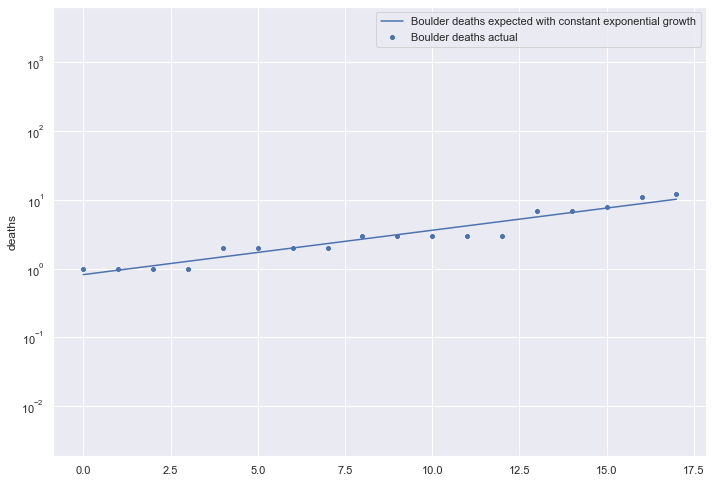

Trajectory plots for Boulder, to see when the curve starts flattening


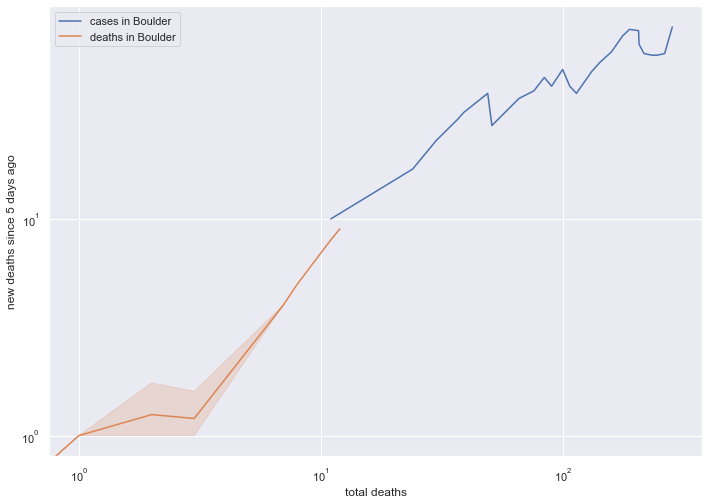

Correlations for Boulder:


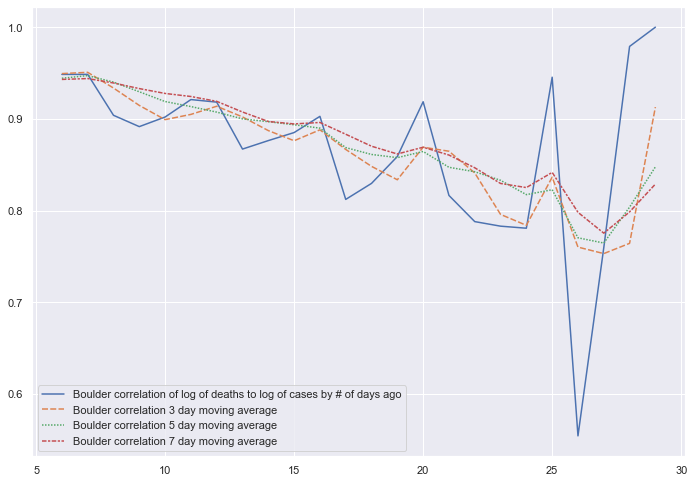

Deaths vs Lagged Values For Boulder:


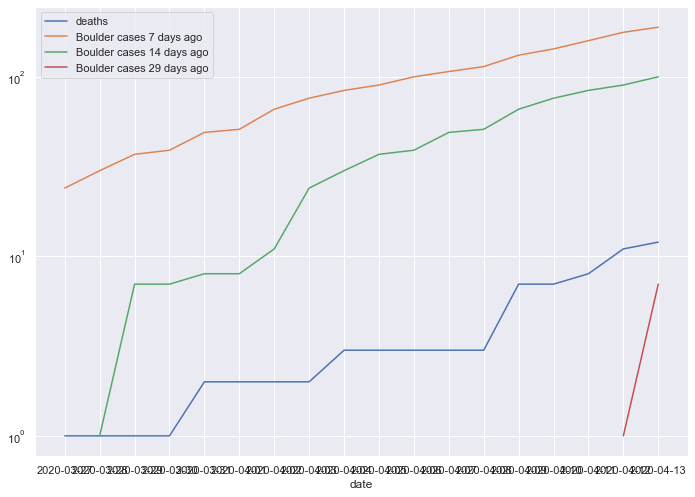

Deaths / Lagged Values For Boulder:


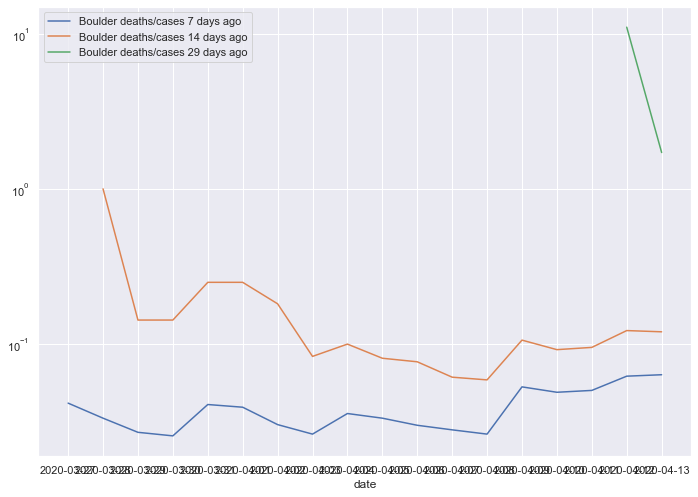


### Analysis for Denver ###

Denver cases exponential formula fitted with 30 points:
cases = 43.54 * exp(0.1346 * day)
fitted daily growth rate: 14.41 %, fitted days to doubling: 5.15
actual daily growth rate: 7.17 %, actual days to doubling: 9.66


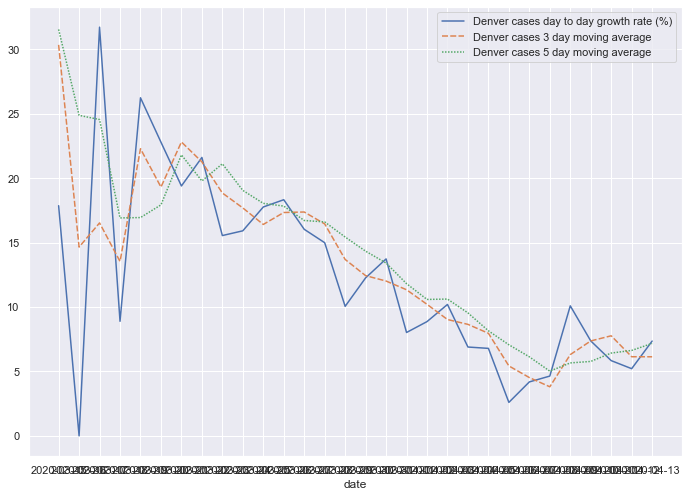

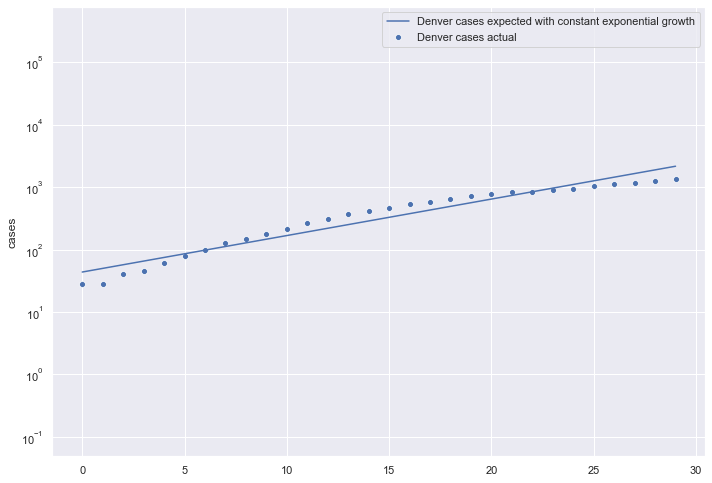

Denver deaths exponential formula fitted with 20 points:
deaths = 2.69 * exp(0.1663 * day)
fitted daily growth rate: 18.09 %, fitted days to doubling: 4.17
actual daily growth rate: 8.24 %, actual days to doubling: 8.42


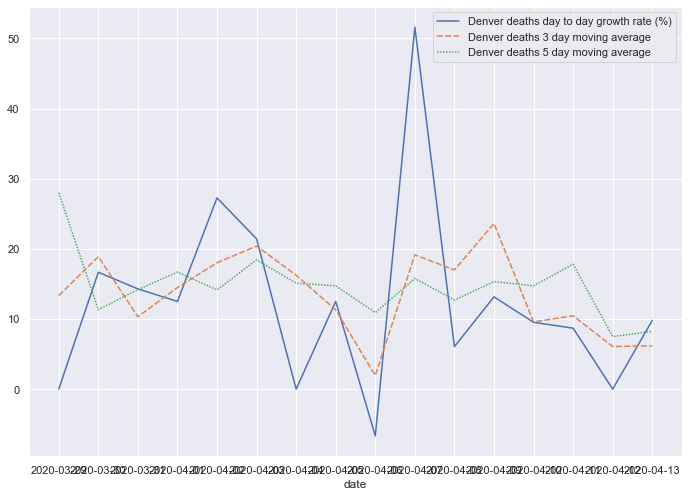

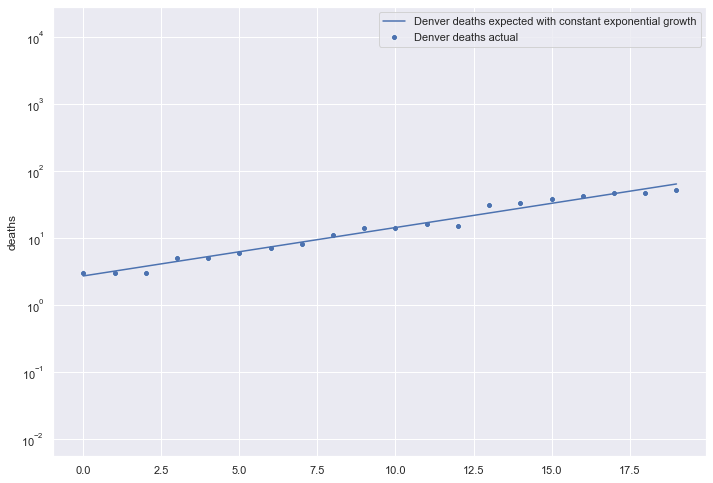

Trajectory plots for Denver, to see when the curve starts flattening


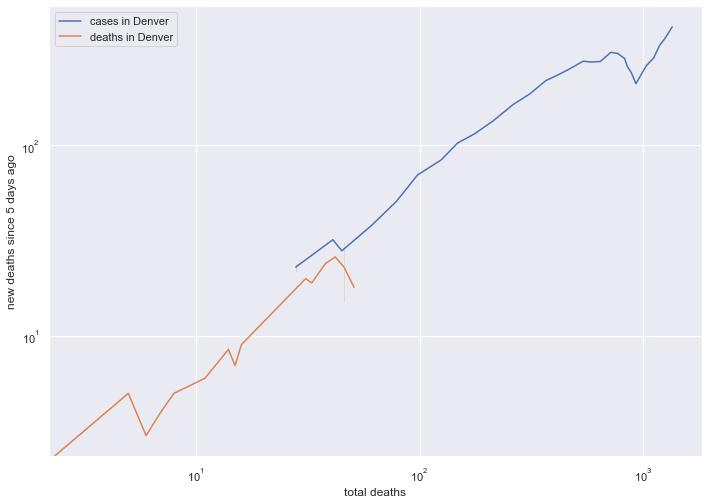

Correlations for Denver:


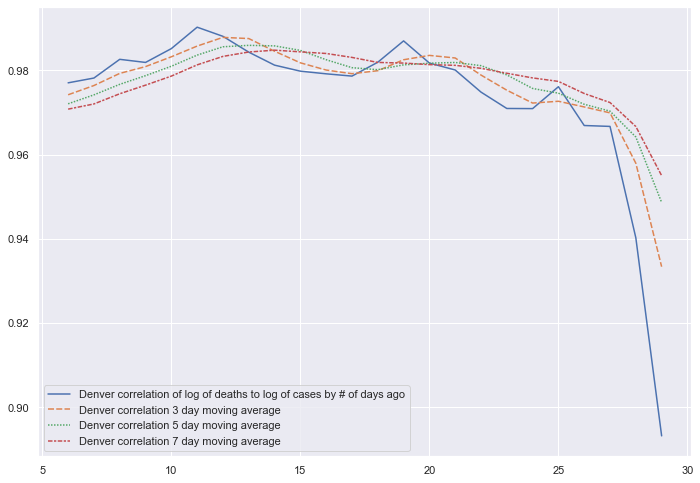

Deaths vs Lagged Values For Denver:


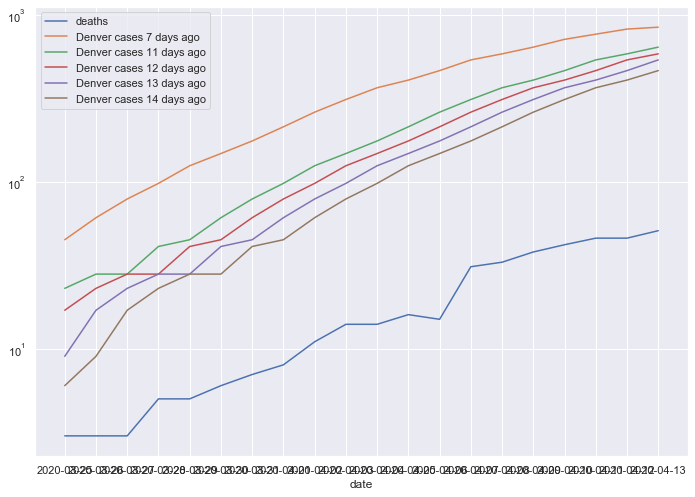

Deaths / Lagged Values For Denver:


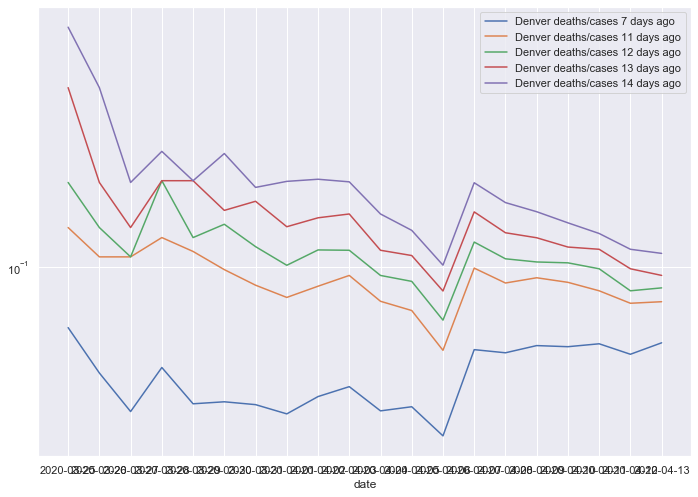


### Analysis for New York City ###

New York City cases exponential formula fitted with 30 points:
cases = 1503.2 * exp(0.1774 * day)
fitted daily growth rate: 19.41 %, fitted days to doubling: 3.91
actual daily growth rate: 5.18 %, actual days to doubling: 13.38


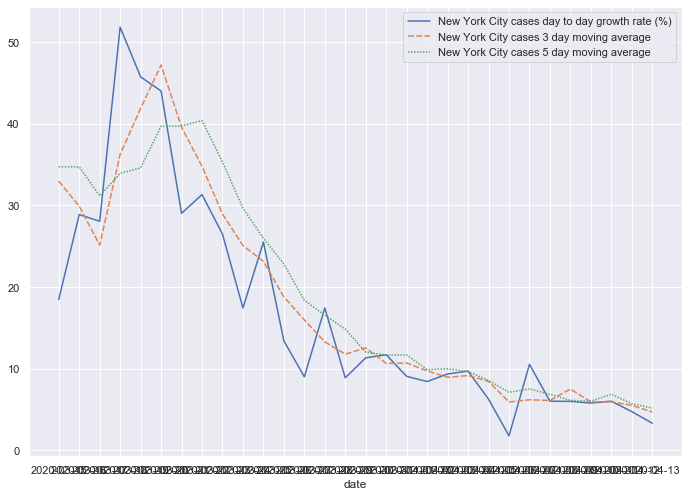

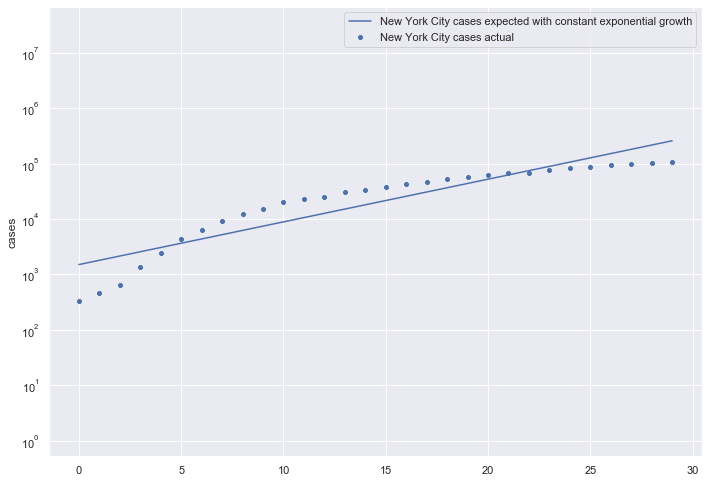

New York City deaths exponential formula fitted with 30 points:
deaths = 13.21 * exp(0.248 * day)
fitted daily growth rate: 28.14 %, fitted days to doubling: 2.8
actual daily growth rate: 8.55 %, actual days to doubling: 8.1


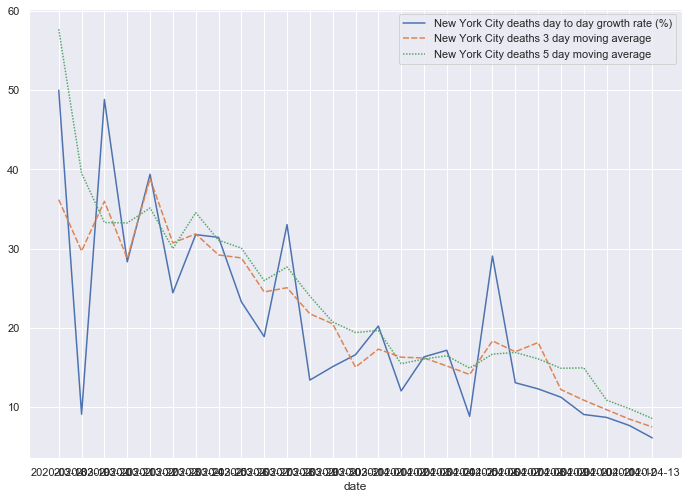

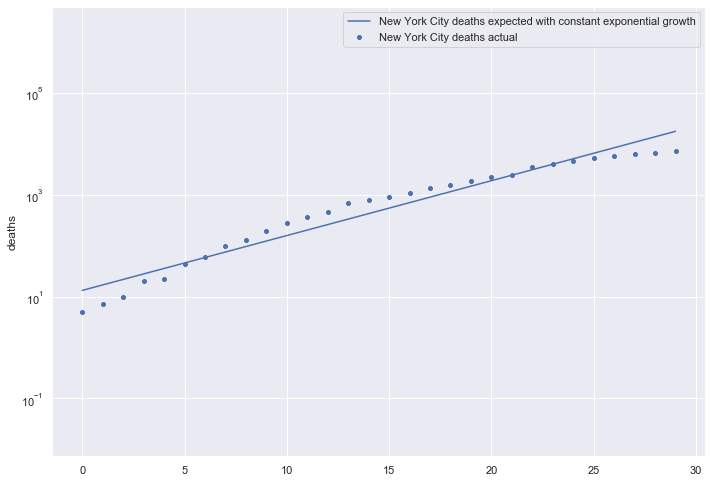

Trajectory plots for New York City, to see when the curve starts flattening


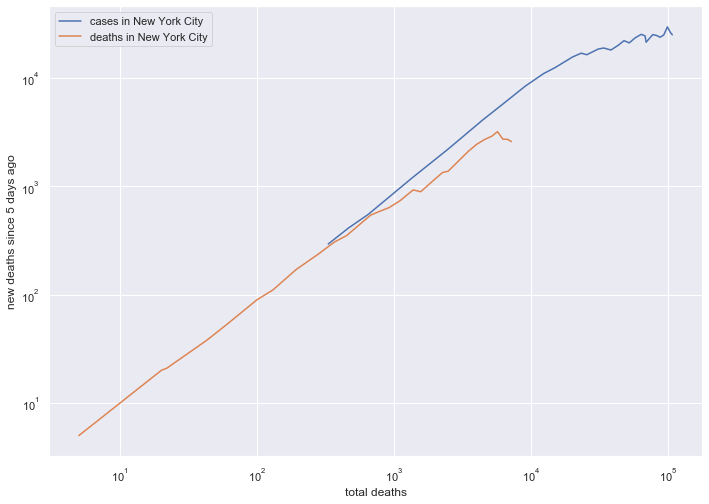

Correlations for New York City:


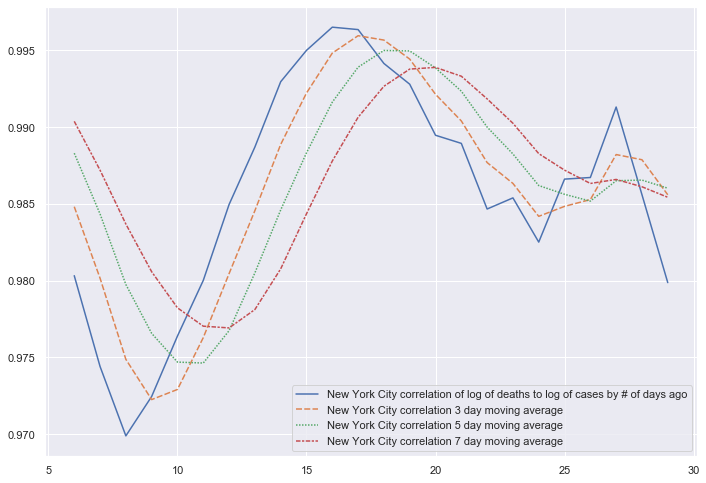

Deaths vs Lagged Values For New York City:


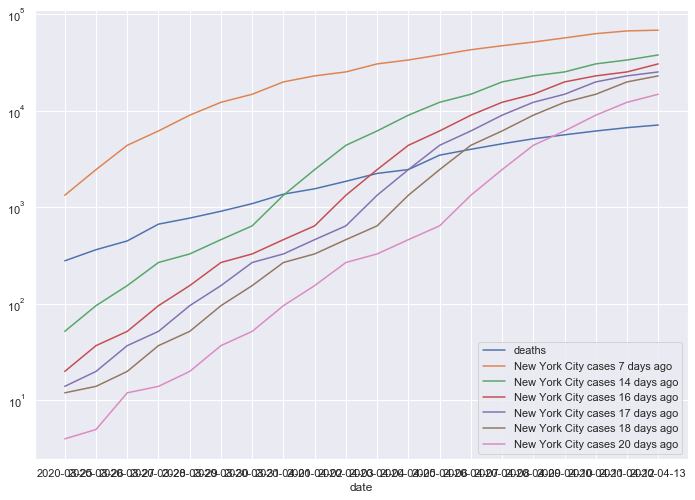

Deaths / Lagged Values For New York City:


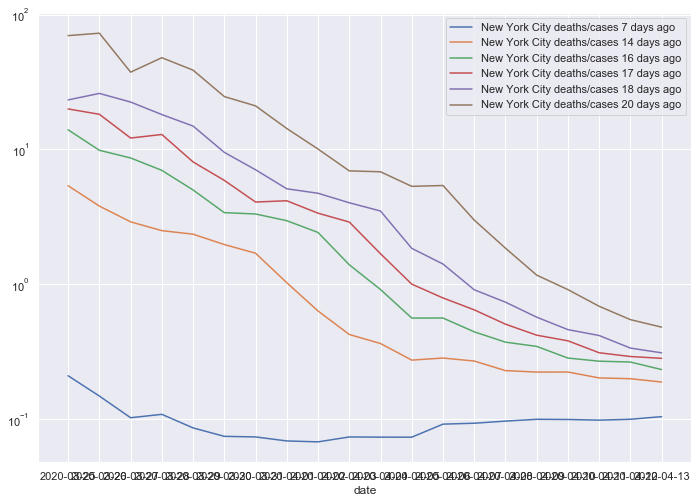


### Analysis for California ###

California cases exponential formula fitted with 30 points:
cases = 702.42 * exp(0.1393 * day)
fitted daily growth rate: 14.95 %, fitted days to doubling: 4.97
actual daily growth rate: 4.78 %, actual days to doubling: 14.49


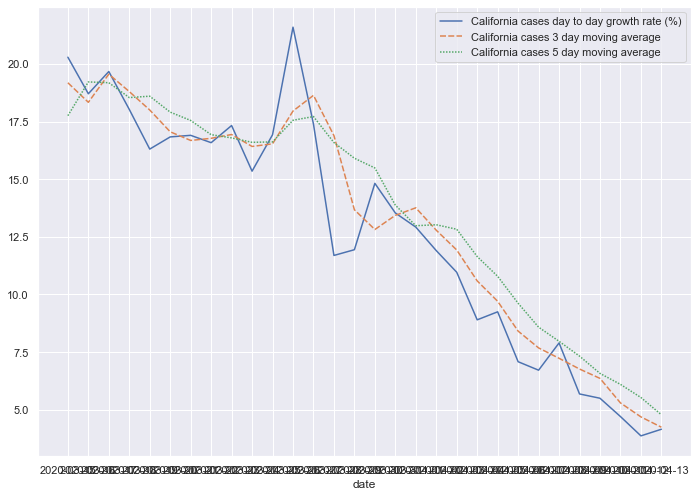

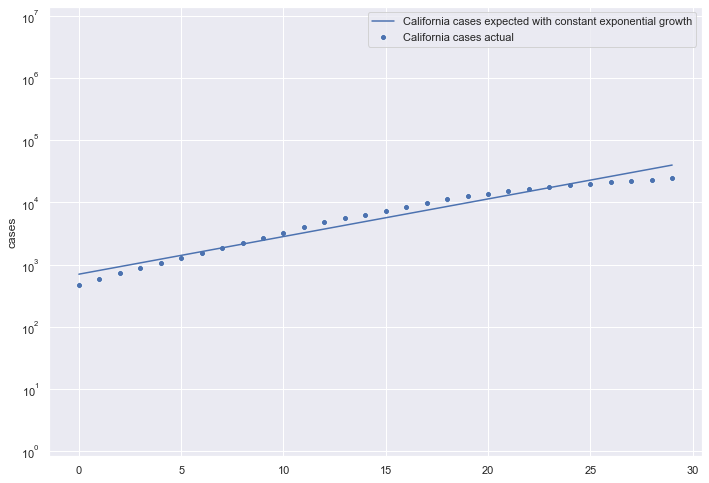

California deaths exponential formula fitted with 30 points:
deaths = 11.45 * exp(0.1586 * day)
fitted daily growth rate: 17.18 %, fitted days to doubling: 4.37
actual daily growth rate: 6.94 %, actual days to doubling: 9.99


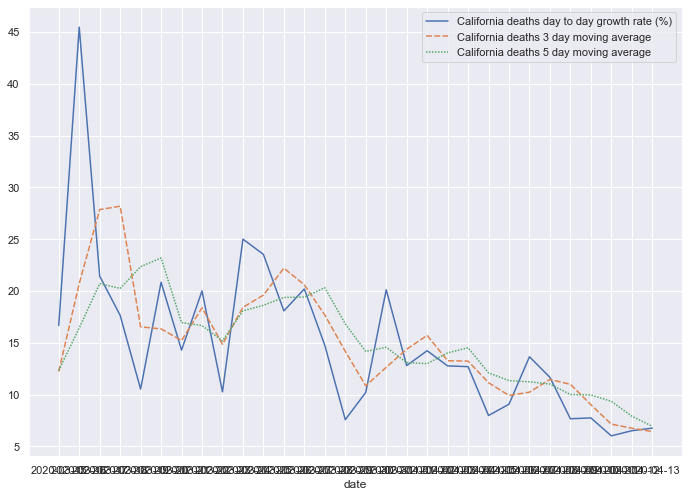

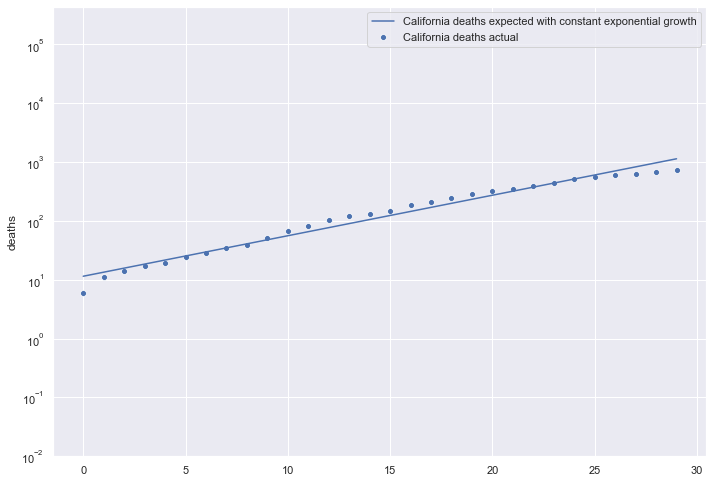

Trajectory plots for California, to see when the curve starts flattening


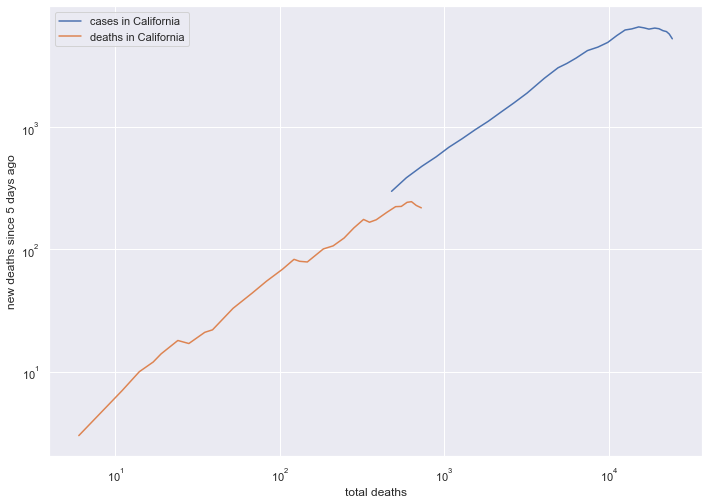

Correlations for California:


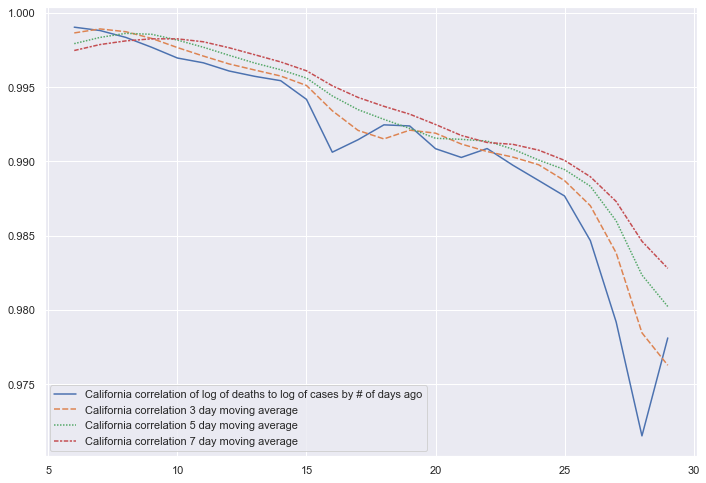

Deaths vs Lagged Values For California:


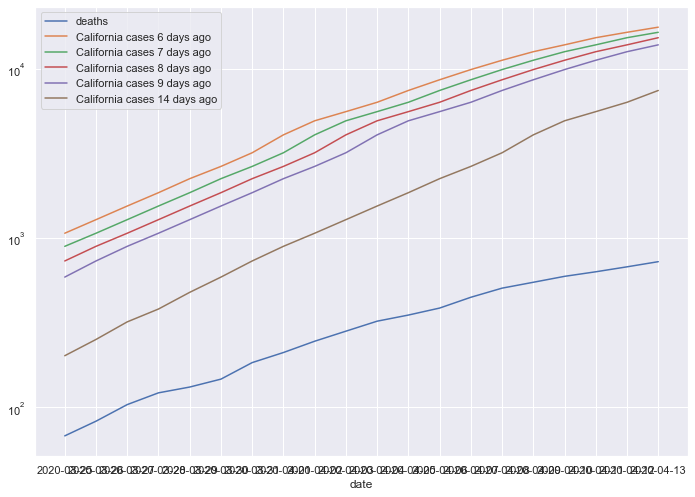

Deaths / Lagged Values For California:


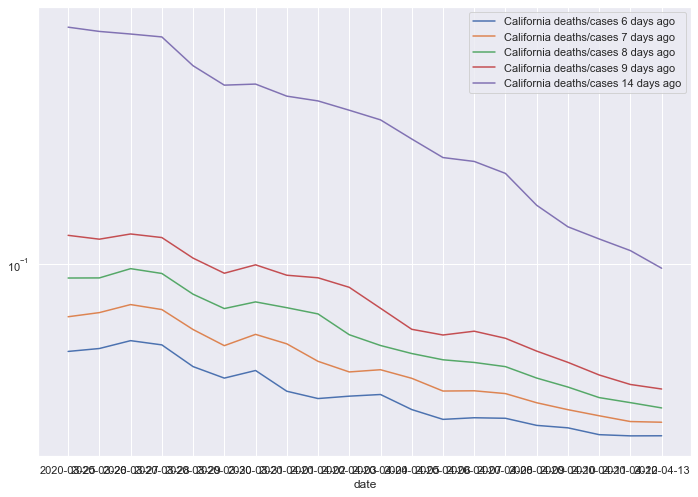


### Analysis for Colorado ###

Colorado cases exponential formula fitted with 30 points:
cases = 207.56 * exp(0.1438 * day)
fitted daily growth rate: 15.47 %, fitted days to doubling: 4.82
actual daily growth rate: 5.95 %, actual days to doubling: 11.65


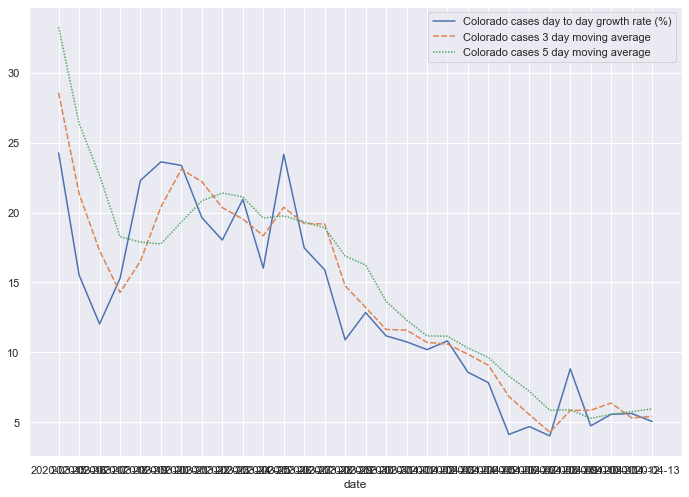

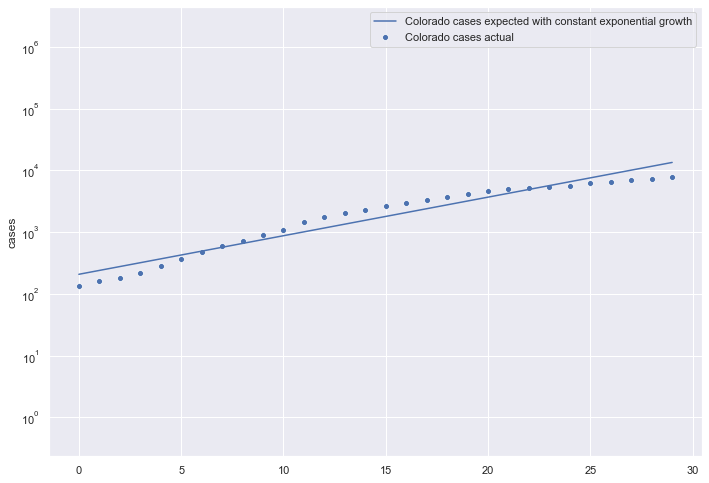

Colorado deaths exponential formula fitted with 30 points:
deaths = 2.39 * exp(0.187 * day)
fitted daily growth rate: 20.56 %, fitted days to doubling: 3.71
actual daily growth rate: 8.94 %, actual days to doubling: 7.75


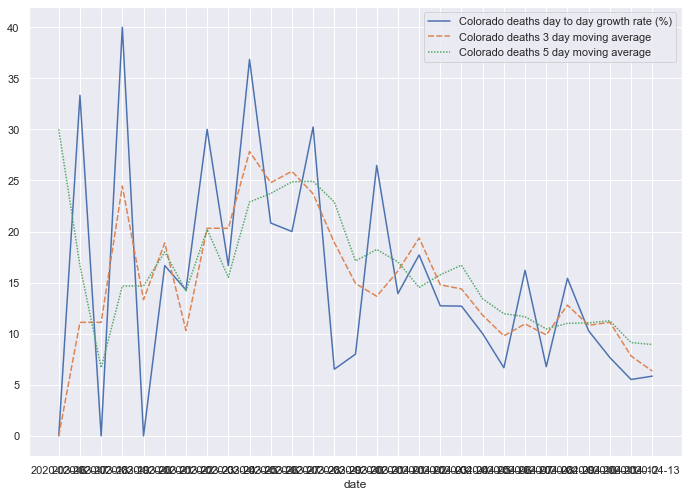

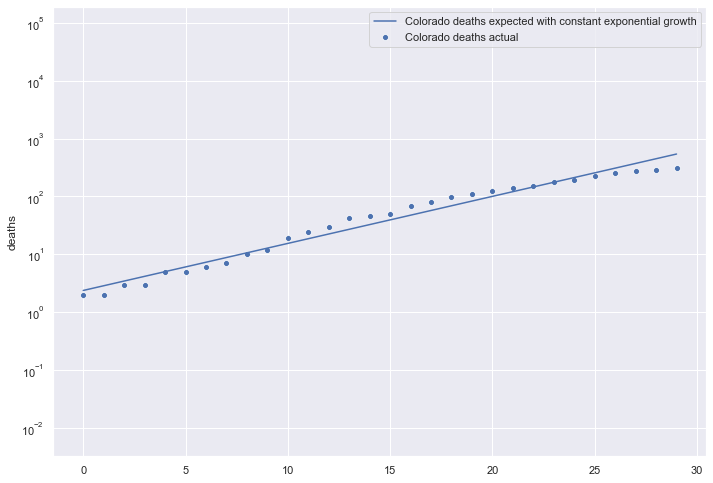

Trajectory plots for Colorado, to see when the curve starts flattening


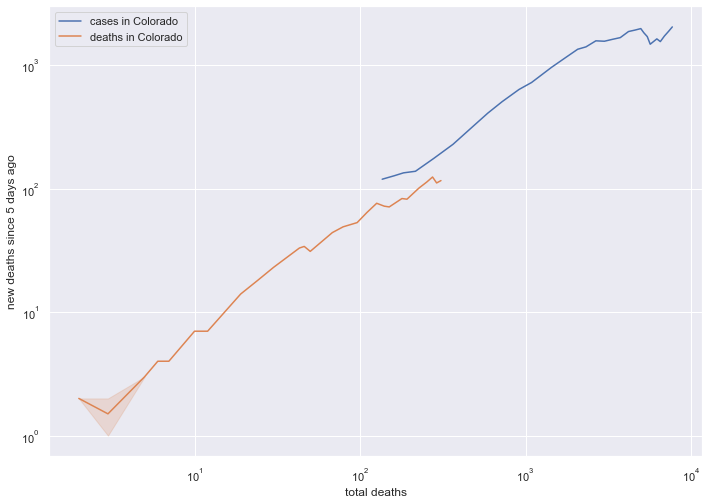

Correlations for Colorado:


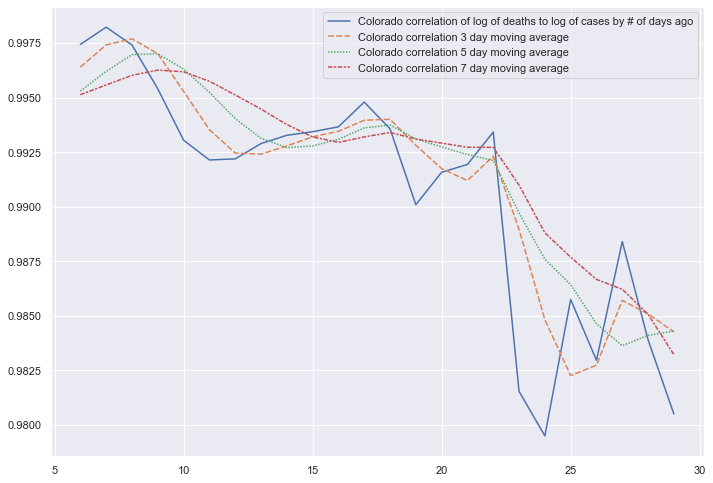

Deaths vs Lagged Values For Colorado:


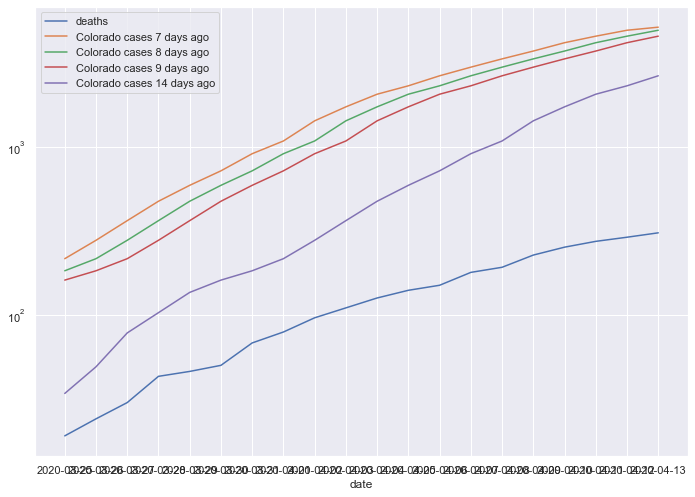

Deaths / Lagged Values For Colorado:


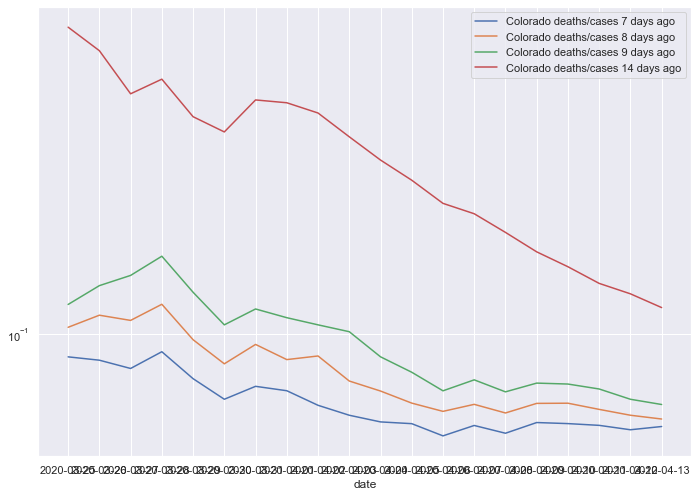


### Analysis for Arizona ###

Arizona cases exponential formula fitted with 30 points:
cases = 32.42 * exp(0.1942 * day)
fitted daily growth rate: 21.43 %, fitted days to doubling: 3.57
actual daily growth rate: 5.9 %, actual days to doubling: 11.75


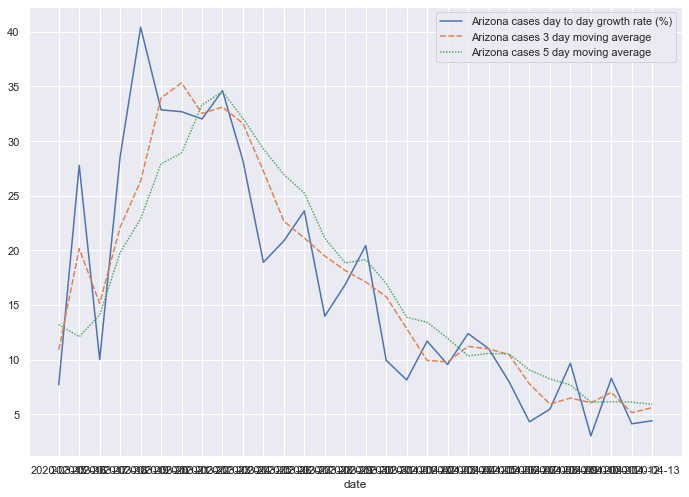

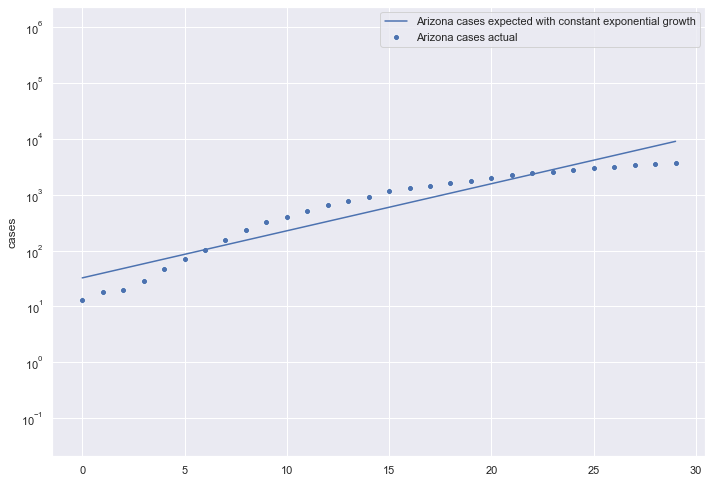

Arizona deaths exponential formula fitted with 25 points:
deaths = 1.48 * exp(0.2102 * day)
fitted daily growth rate: 23.39 %, fitted days to doubling: 3.3
actual daily growth rate: 8.25 %, actual days to doubling: 8.4


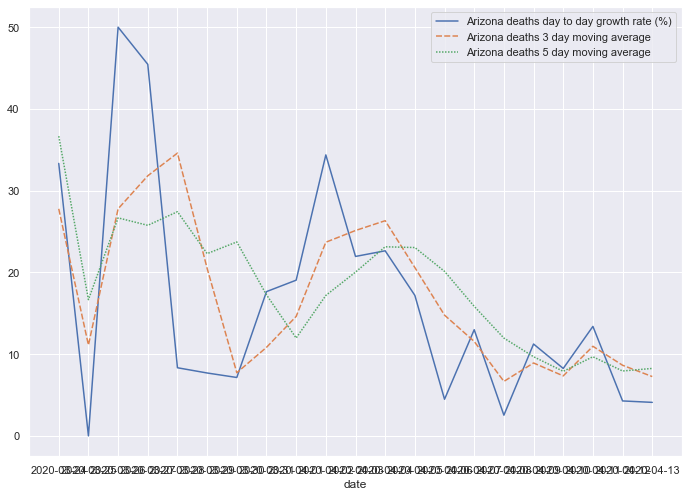

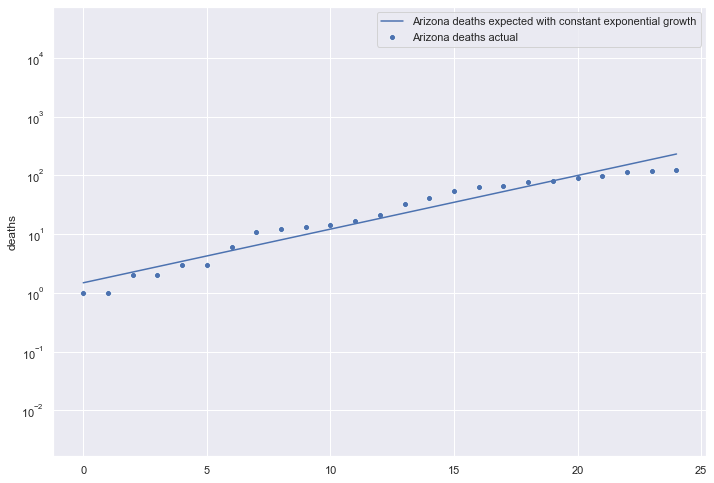

Trajectory plots for Arizona, to see when the curve starts flattening


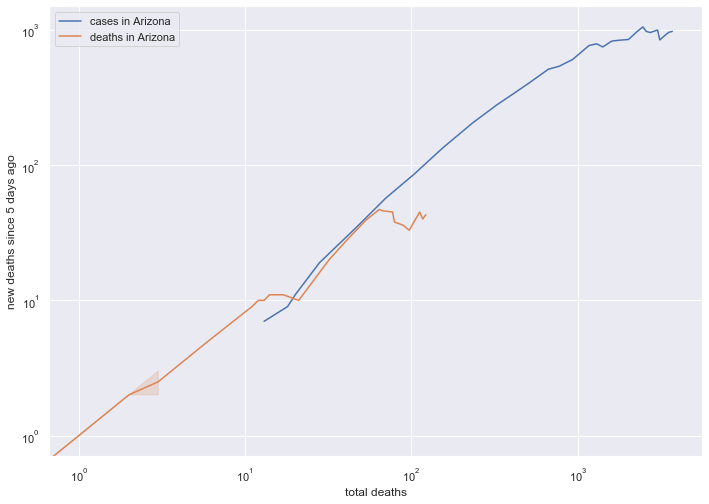

Correlations for Arizona:


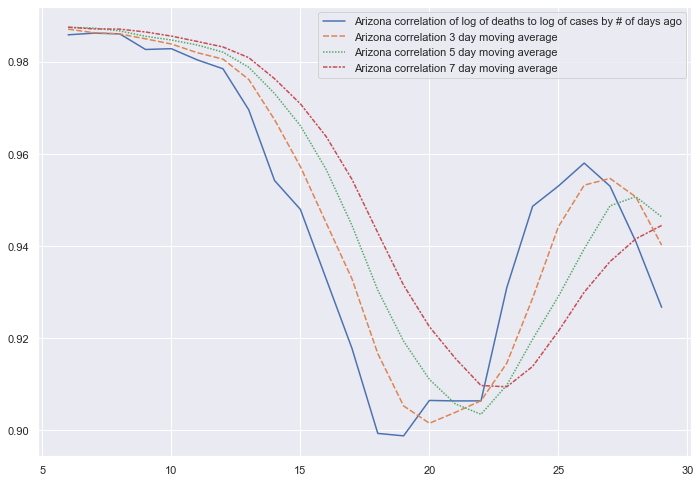

Deaths vs Lagged Values For Arizona:


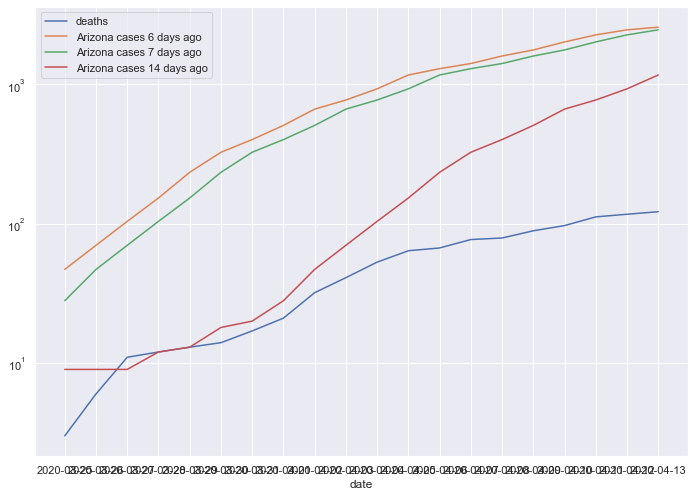

Deaths / Lagged Values For Arizona:


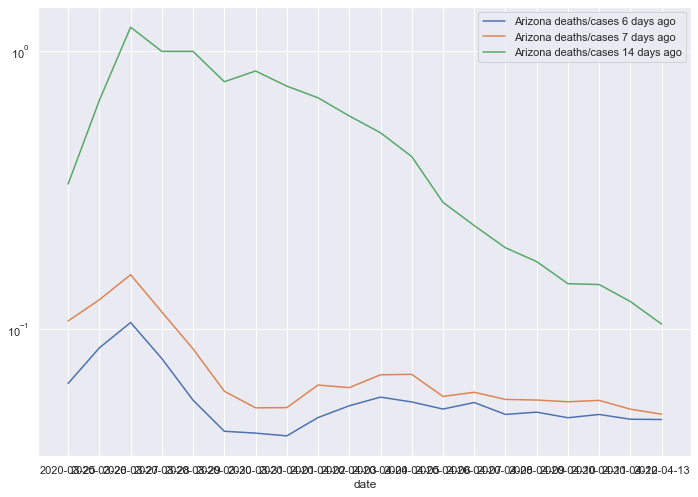


### Analysis for USA total: ###

USA total: cases exponential formula fitted with 30 points:
cases = 7993.76 * exp(0.1722 * day)
fitted daily growth rate: 18.8 %, fitted days to doubling: 4.02
actual daily growth rate: 5.86 %, actual days to doubling: 11.82


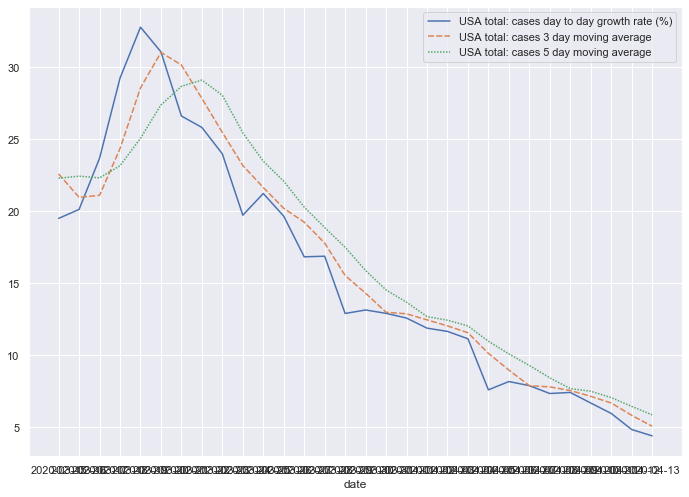

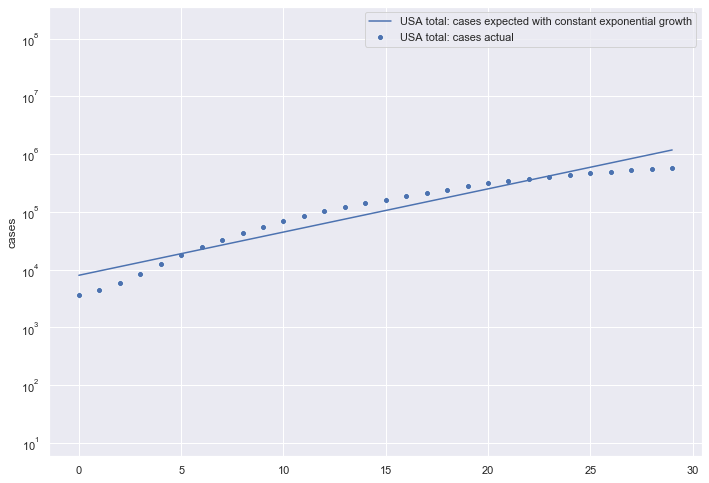

USA total: deaths exponential formula fitted with 30 points:
deaths = 102.49 * exp(0.2083 * day)
fitted daily growth rate: 23.16 %, fitted days to doubling: 3.33
actual daily growth rate: 8.92 %, actual days to doubling: 7.77


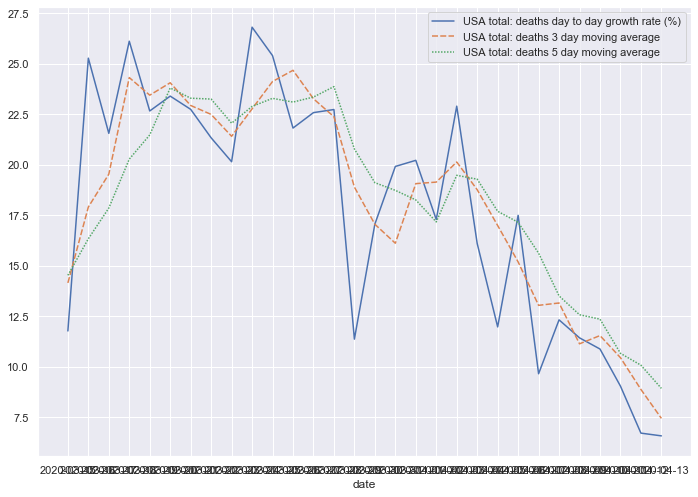

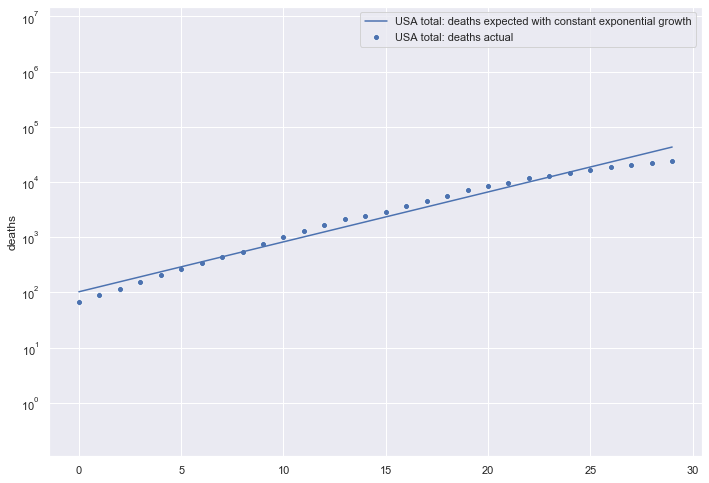

Trajectory plots for USA total:, to see when the curve starts flattening


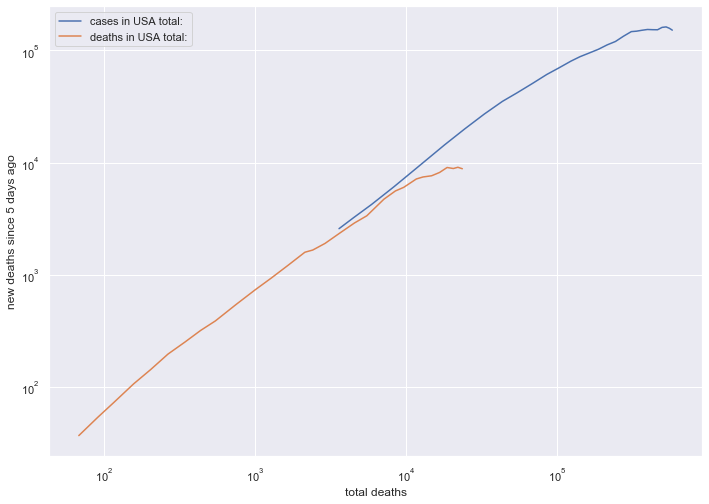

Correlations for USA total::


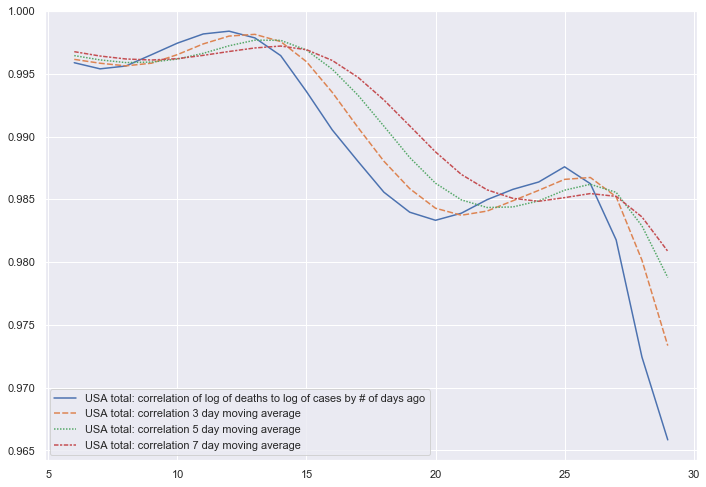

Deaths vs Lagged Values For USA total::


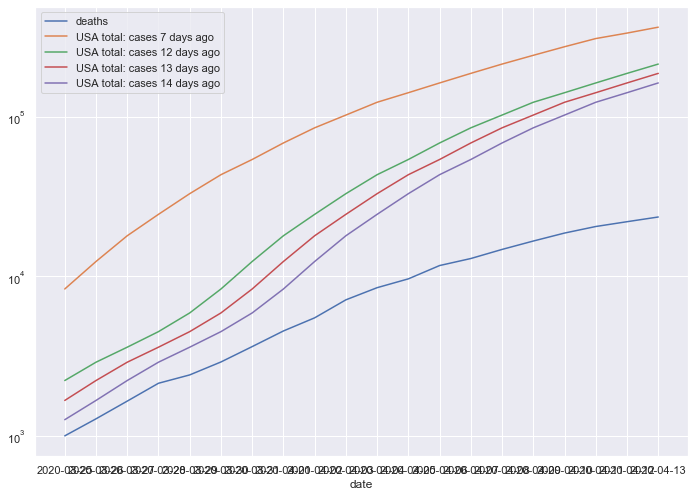

Deaths / Lagged Values For USA total::


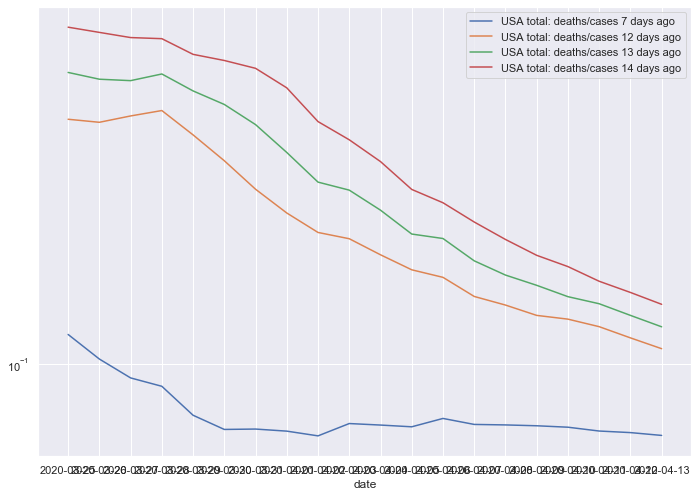

In [21]:
counties =["San Francisco", "Los Angeles", "Boulder", "Denver", "New York City"]
states = [ "California", "Colorado", "Arizona"]
analyse(counties=counties, states=states)